<a href="https://colab.research.google.com/github/nrhodes/cs152fa2019/blob/master/Simple_classification_Gradient_Descent_(Linear_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import math
import numpy as np
from tqdm import tqdm

DEBUG=False

In [0]:
def sigmoid(x):
  return 1/(1+math.exp(-x))
  
def f(pt):
  return (pt[1] - (a0 + a1 * pt[0]))/math.sqrt(1 + a1**2)

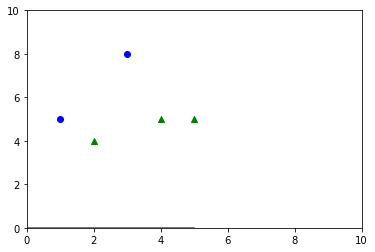

In [42]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 10))
ax.set_ylim((0, 10))

xs = [(1, 5), (2, 4), (3, 8), (4, 5), (5, 5)]
ys = [1, 0, 1, 0, 0]

# params
a0 = 0
a1 = 0


# hyper-params
𝜆 = .15
num_epochs=15000

xpositives = [x for x, y in zip(xs, ys) if y == 1]
xnegatives = [x for x, y in zip(xs, ys) if y == 0]
line, = ax.plot([0, 5], [a0, a1*5 + a0], c='red')
scatter = ax.scatter([x[0] for x in xpositives], [x[1] for x in xpositives], c='blue', marker='o')
scatter = ax.scatter([x[0] for x in xnegatives], [x[1] for x in xnegatives], c='green', marker='^')

loss_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)
weights_text = ax.text(0.02, .82, '', transform=ax.transAxes)

plt.show()

In [0]:
def crossentropy_loss(ŷ, y):
  result = -y*math.log(ŷ) -(1-y)*math.log(1-ŷ)
  if DEBUG:
    print("crossentropy_loss: y", y)
    print("crossentropy_loss: ŷ", ŷ)
    print("crossentropy_loss result: ", result)
  return result

def losses():
  cross_entropies = [crossentropy_loss(sigmoid(f(x)), y) for (x, y) in zip(xs, ys)]
  if DEBUG:
    print('xs', xs)
    print('ys', ys)
    print('f(x)', [f(x) for x in xs])
    print('cross_entropies', cross_entropies)
  return cross_entropies

def loss():
  return sum(losses()) / len(xs) 

In [0]:
# https://www.wolframalpha.com/input/?i=differentiate+%28m*x%2Bb+-y%29%2Fsqrt%281%2Bm%5E2%29+wrt+m
# With respect to a_1
def dFdA1(pt):
  return -(-a0*a1 + a1*pt[1] + pt[0])/math.pow(1+a1**2, 1.5)
  
def gradient_descent():
  global a0, a1
  dLdFs = [sigmoid(f(x))-y for (x, y) in zip(xs, ys)];
  # https://www.wolframalpha.com/input/?i=differentiate+%28m*x%2Bb+-y%29%2Fsqrt%281%2Bm%5E2%29+wrt+b
  dFdA0 = -1/(math.sqrt(1+a1**2))
  
  gradient_a0s = [dLdF * dFdA0 for (dLdF, pt) in zip(dLdFs, xs)]
  gradient_a1s = [dLdF * dFdA1(pt) for (dLdF, pt) in zip(dLdFs, xs)]

  gradient_a0 = sum(gradient_a0s) / len(xs)
  gradient_a1 = sum(gradient_a1s) / len(xs)

  if DEBUG:
    print("gradient-descent dLdFs", dLdFs)
    print("gradient-descent gradient_a0s", gradient_a0s)
    print("gradient-descent gradient_a1s", gradient_a1s)
    epsilon = 0.0001
    losses = [crossentropy_loss(sigmoid(f(x)), y) for (x, y) in zip(xs, ys)]
    old_a0 = a0
    a0 = a0 + epsilon
    lossesEpsilon = [crossentropy_loss(sigmoid(f(x)), y) for (x, y) in zip(xs, ys)]
    a0 = old_a0

    numericdLdA0 = [(lossEpsilon - loss)/epsilon for loss, lossEpsilon in zip(losses, lossesEpsilon)]
    print("losses", losses)
    print("lossesEpsilon", lossesEpsilon)
    print("gradient-descent numericdLdA0", numericdLdA0)

    old_a1 = a1
    a1 = a1 + epsilon
    lossesEpsilon = [crossentropy_loss(sigmoid(f(x)), y) for (x, y) in zip(xs, ys)]
    a1 = old_a1

    numericdLdA1 = [(lossEpsilon - loss)/epsilon for loss, lossEpsilon in zip(losses, lossesEpsilon)]
    print("gradient-descent numericdLdA1", numericdLdA1)

    #losses = [crossentropy_loss(sigmoid(f(x)), y) for (x, y) in zip(xs, ys)]
    #lossesEpsilon = [crossentropy_loss(sigmoid(f(x) + epsilon), y) for (x, y) in zip(xs, ys)]
    #print("losses", losses)
    #print("lossesEpsilon", lossesEpsilon)
    #numericdLdFs = [(lossEpsilon - loss)/epsilon for loss, lossEpsilon in zip(losses, lossesEpsilon)]
    #print("gradient-descent numericdLdFs", numericdLdFs)

  a0 -= 𝜆*gradient_a0
  a1 -= 𝜆*gradient_a1


In [45]:
a0 = 0
a1 = 0
for i in tqdm(range(num_epochs)):
  gradient_descent()

100%|██████████| 15000/15000 [00:00<00:00, 101746.69it/s]


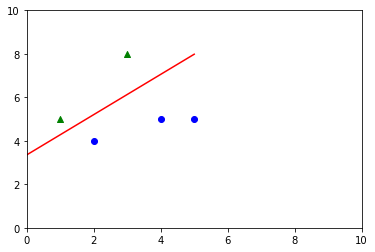

In [46]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 10))
ax.set_ylim((0, 10))

xs = [(1, 5), (2, 4), (3, 8), (4, 5), (5, 5)]
ys = [0, 1, 0, 1, 1]


xpositives = [x for x, y in zip(xs, ys) if y == 1]
xnegatives = [x for x, y in zip(xs, ys) if y == 0]
line, = ax.plot([0, 5], [a0, a1*5 + a0], c='red')
scatter = ax.scatter([x[0] for x in xpositives], [x[1] for x in xpositives], c='blue', marker='o')
scatter = ax.scatter([x[0] for x in xnegatives], [x[1] for x in xnegatives], c='green', marker='^')
plt.show()